In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys


In [64]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [65]:
data = pd.read_excel('시험용.xlsx')
data.head()

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,gender,age,education,region,wage,workcode
0,0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,2.0,2,1945,4,1,NaN,NaN
1,1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,1,1948,3,1,172.0,942.0
2,2,1.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1,1942,7,1,100.0,762.0
3,3,1.0,4.0,1.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,1,1962,6,1,268.0,855.0
4,4,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,3.0,2,1963,5,1,140.0,399.0


In [66]:
data['age'] = 2023 - data['age']

In [67]:
data.info()
data= data.loc[data['Q1']!=9,:]
data=data.loc[data['Q1'].notnull(),:]
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16591 entries, 0 to 16590
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  16591 non-null  int64  
 1   Q1          14152 non-null  float64
 2   Q2          14152 non-null  float64
 3   Q3          14152 non-null  float64
 4   Q4          14152 non-null  float64
 5   Q5          14152 non-null  float64
 6   Q6          14152 non-null  float64
 7   Q7          14152 non-null  float64
 8   Q8          14152 non-null  float64
 9   Q9          14152 non-null  float64
 10  Q10         14152 non-null  float64
 11  Q11         14152 non-null  float64
 12  gender      16591 non-null  int64  
 13  age         16591 non-null  int64  
 14  education   16591 non-null  int64  
 15  region      16591 non-null  int64  
 16  wage        5633 non-null   float64
 17  workcode    8403 non-null   float64
dtypes: float64(13), int64(5)
memory usage: 2.3 MB


Unnamed: 0       0
Q1               0
Q2               0
Q3               0
Q4               0
Q5               0
Q6               0
Q7               0
Q8               0
Q9               0
Q10              0
Q11              0
gender           0
age              0
education        0
region           0
wage          8081
workcode      5416
dtype: int64

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13474 entries, 0 to 16590
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13474 non-null  int64  
 1   Q1          13474 non-null  float64
 2   Q2          13474 non-null  float64
 3   Q3          13474 non-null  float64
 4   Q4          13474 non-null  float64
 5   Q5          13474 non-null  float64
 6   Q6          13474 non-null  float64
 7   Q7          13474 non-null  float64
 8   Q8          13474 non-null  float64
 9   Q9          13474 non-null  float64
 10  Q10         13474 non-null  float64
 11  Q11         13474 non-null  float64
 12  gender      13474 non-null  int64  
 13  age         13474 non-null  int64  
 14  education   13474 non-null  int64  
 15  region      13474 non-null  int64  
 16  wage        5393 non-null   float64
 17  workcode    8058 non-null   float64
dtypes: float64(13), int64(5)
memory usage: 2.0 MB


In [69]:
qdata = data.iloc[:,1:12]

qdata['total'] = data.iloc[:,1:12].sum(axis=1)
# qdata.head()
med = qdata['total'].mean()
qdata['y_train'] = np.where(qdata['total'] > 22,1,0)
qdata['y_train'].value_counts()


y_train
0    11660
1     1814
Name: count, dtype: int64

In [70]:
data.head()

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,gender,age,education,region,wage,workcode
0,0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,2.0,2,78,4,1,NaN,NaN
1,1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,1,75,3,1,172.0,942.0
2,2,1.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1,81,7,1,100.0,762.0
3,3,1.0,4.0,1.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,1,61,6,1,268.0,855.0
4,4,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,3.0,2,60,5,1,140.0,399.0


In [71]:
data['y_total'] = qdata['total']
data['y_train'] = qdata['y_train']
data.head()

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,gender,age,education,region,wage,workcode,y_total,y_train
0,0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,2.0,2,78,4,1,NaN,NaN,20.0,0
1,1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,1,75,3,1,172.0,942.0,29.0,1
2,2,1.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1,81,7,1,100.0,762.0,18.0,0
3,3,1.0,4.0,1.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,1,61,6,1,268.0,855.0,20.0,0
4,4,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,3.0,2,60,5,1,140.0,399.0,21.0,0


## 급료 결측치 포함해서 ㄱㄱ 

In [72]:
df = data.copy()

In [73]:
df.loc[df['region']>=4 ,'region'] = 'country'
df.loc[df['region']!='country' ,'region'] = 'city'
df['region'].unique()

array(['city', 'country'], dtype=object)

In [74]:
df['region'].value_counts()

region
city       10826
country     2648
Name: count, dtype: int64

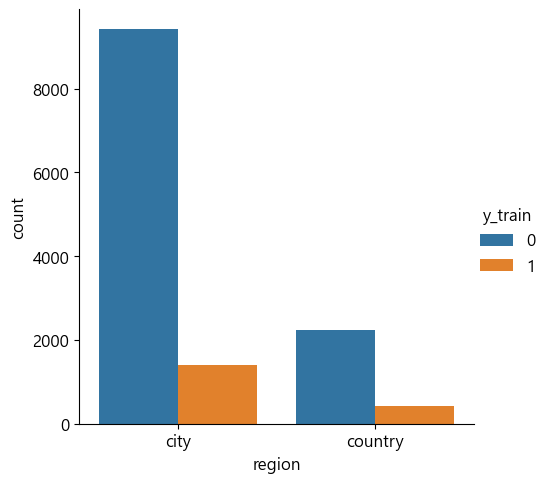

In [75]:
sns.catplot(data=df,x='region',kind='count',hue='y_train')

In [76]:
len(df[df['region']=='country'])

2648

In [77]:
from sklearn.utils import resample

subset_city_downsampled = resample(df[df['region']=='city'],
                            replace=False,
                            n_samples =2648 ,
                            random_state = 2020)


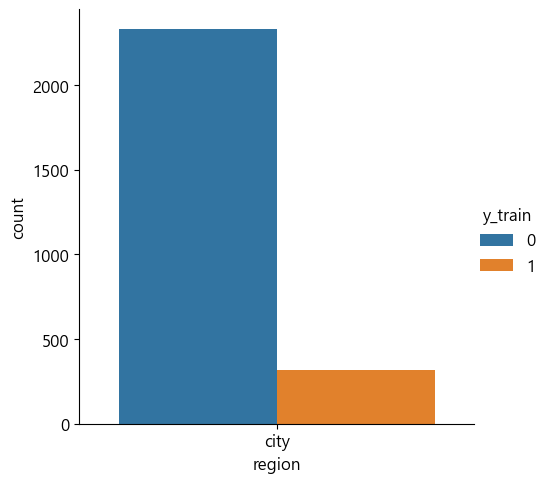

In [78]:
sns.catplot(data=subset_city_downsampled,x='region',kind='count',hue='y_train')

In [79]:
region_data = pd.concat([df[df['region']=='country'],subset_city_downsampled])
region_data.head()

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,gender,age,education,region,wage,workcode,y_total,y_train
249,249,1.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1,46,6,country,NaN,442.0,17.0,0
250,250,1.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,2,46,6,country,NaN,952.0,17.0,0
311,311,1.0,4.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,1.0,2.0,1,60,5,country,NaN,873.0,19.0,0
312,312,1.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,2,33,5,country,NaN,399.0,17.0,0
478,478,1.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1,76,5,country,NaN,611.0,17.0,0


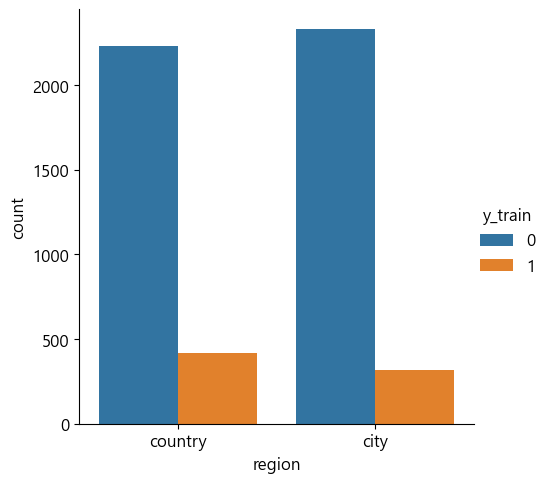

In [80]:
sns.catplot(data=region_data,x='region',kind='count',hue='y_train')

In [81]:
bins = [20,29,39,49,59,99]
labels = ['19~29세','30~39세','40~49세','50~59세','60세 이상']

cuts = pd.cut(df['age'],bins,labels=labels)
df['age_range'] = cuts
# new_df.head()

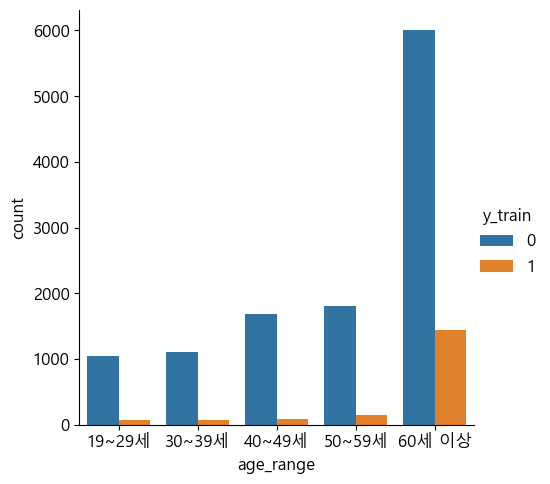

In [82]:
sns.catplot(data=df,x='age_range',kind='count',hue='y_train')

In [83]:
df.loc[df['education']<=3,'education']="초졸이하"
df.loc[df['education']==4,'education']="중졸"
df.loc[df['education']==5,'education']="고졸"
df.loc[df['education']==6,'education']="대졸이상"
df.loc[df['education']==7,'education']="대졸이상"
df.loc[df['education']==8,'education']="대졸이상"
df.loc[df['education']==9,'education']="대졸이상"
df['education'].unique()


array(['중졸', '초졸이하', '대졸이상', '고졸'], dtype=object)

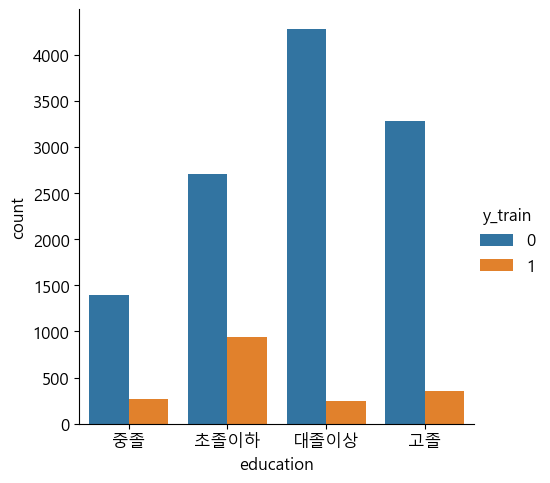

In [84]:
sns.catplot(data=df,x='education',kind='count',hue='y_train')

In [85]:
condition = (
    ((df['workcode']>=100) & (df['workcode']<200)),
    ((df['workcode']>=300) & (df['workcode']<400)),
    ((df['workcode']>=400) & (df['workcode']<500)),
    ((df['workcode']>=600) & (df['workcode']<700)),
    ((df['workcode']>=700) & (df['workcode']<800))
)
value = ['관리직','사무종사자','서비스판매','농업','기능노무']
df['workcode'] = np.select(condition,value,default=0)
df['workcode'].unique()

array(['0', '기능노무', '사무종사자', '관리직', '서비스판매', '농업'], dtype=object)

In [87]:
df = df.loc[df['workcode']!="0", :]
df['workcode'].unique()

array(['기능노무', '사무종사자', '관리직', '서비스판매', '농업'], dtype=object)

In [89]:
df['workcode'].value_counts()

workcode
농업       1306
사무종사자     976
서비스판매     873
기능노무      557
관리직       305
Name: count, dtype: int64

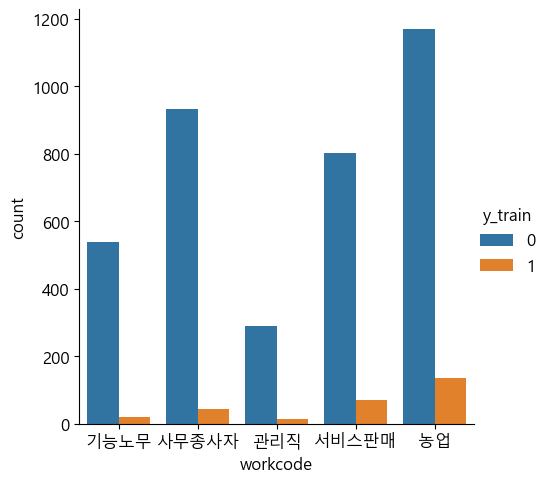

In [90]:
sns.catplot(data=df,x='workcode',kind='count',hue='y_train')

<Axes: xlabel='age', ylabel='y_total'>

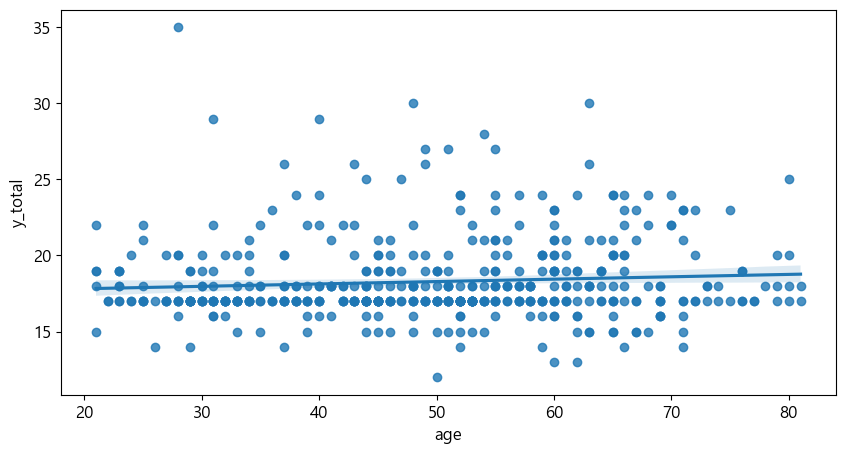

In [96]:
sns.regplot(data=df.head(500),x='age',y='y_total')

In [54]:
test = data
test.loc[(test['workcode']>=600)&(test['workcode']<700),:'wage'].isnull().sum()



Unnamed: 0       0
Q1               0
Q2               0
Q3               0
Q4               0
Q5               0
Q6               0
Q7               0
Q8               0
Q9               0
Q10              0
Q11              0
gender           0
age              0
education        0
region           0
wage          1286
dtype: int64

In [8]:
new_df = data.loc[data['wage']>0 ,:]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5375 entries, 1 to 16586
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5375 non-null   int64  
 1   Q1          5375 non-null   float64
 2   Q2          5375 non-null   float64
 3   Q3          5375 non-null   float64
 4   Q4          5375 non-null   float64
 5   Q5          5375 non-null   float64
 6   Q6          5375 non-null   float64
 7   Q7          5375 non-null   float64
 8   Q8          5375 non-null   float64
 9   Q9          5375 non-null   float64
 10  Q10         5375 non-null   float64
 11  Q11         5375 non-null   float64
 12  gender      5375 non-null   int64  
 13  age         5375 non-null   int64  
 14  education   5375 non-null   int64  
 15  region      5375 non-null   int64  
 16  wage        5375 non-null   float64
 17  workcode    5374 non-null   float64
 18  y_total     5375 non-null   float64
 19  y_train     5375 non-null   int

In [9]:
new_df.head()

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,gender,age,education,region,wage,workcode,y_total,y_train
1,1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,1,1948,3,1,172.0,942.0,29.0,1
2,2,1.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1,1942,7,1,100.0,762.0,18.0,0
3,3,1.0,4.0,1.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,1,1962,6,1,268.0,855.0,20.0,0
4,4,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,3.0,2,1963,5,1,140.0,399.0,21.0,0
8,8,2.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2,1940,3,3,27.0,941.0,20.0,0


In [10]:
new_df.loc[new_df['region']>=4 ,'region'] = 'country'


In [11]:
new_df.loc[new_df['region']!='country' ,'region'] = 'city'
new_df['region'].unique()

array(['city', 'country'], dtype=object)

In [12]:
new_df['region'].value_counts()

region
city       4653
country     722
Name: count, dtype: int64

In [13]:
new_dum_df = pd.get_dummies(new_df.loc[:,'region'],dtype='int')
new_dum_df

,city,country
1,1,0
2,1,0
3,1,0
4,1,0
8,1,0
...,...,...
16574,1,0
16575,1,0
16578,1,0
16579,1,0


In [14]:
new_dum_df['y_train']=new_df['y_train']
new_dum_df['y_total']=new_df['y_total']

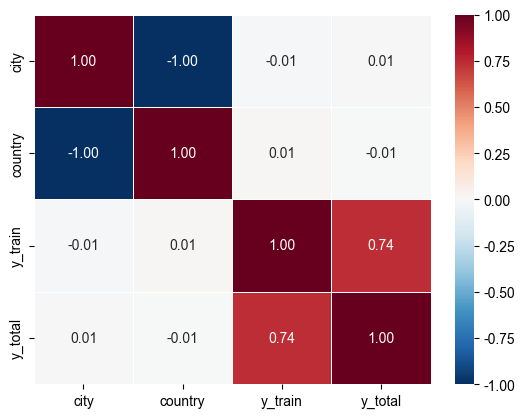

In [15]:
sns.heatmap(data = new_dum_df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='RdBu_r')
sns.set_theme(font ='Malgun Gothic',
           rc = {'axes.unicode_minus' : False},
           style ='whitegrid')
plt.show()

In [16]:
group_df =new_df[['region','y_train']].groupby(['region','y_train']).value_counts()

In [17]:
group_df

region   y_train
city     0          4314
         1           339
country  0           664
         1            58
Name: count, dtype: int64

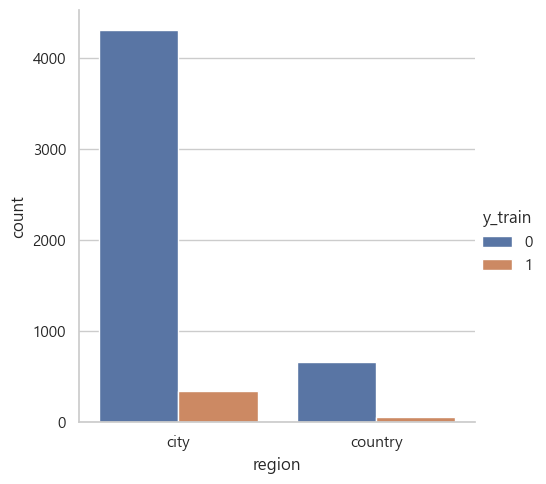

In [18]:
sns.catplot(data=new_df,x='region',kind='count',hue='y_train')

In [19]:
from sklearn.utils import resample

subset_city_downsampled = resample(new_df[new_df['region']=='city'],
                            replace=False,
                            n_samples = 722,
                            random_state = 2020)



In [20]:
subset_city_downsampled.head()

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,gender,age,education,region,wage,workcode,y_total,y_train
14883,14883,1.0,4.0,1.0,1.0,3.0,1.0,4.0,1.0,1.0,1.0,1.0,2,1977,7,city,658.0,312.0,19.0,0
6256,6256,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1,1973,5,city,408.0,922.0,19.0,0
6834,6834,1.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1,1993,7,city,478.0,252.0,17.0,0
13142,13142,4.0,3.0,2.0,3.0,3.0,2.0,4.0,1.0,1.0,1.0,1.0,2,1941,2,city,27.0,952.0,25.0,1
891,891,1.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,2,1979,7,city,215.0,243.0,17.0,0


In [21]:
region_data = pd.concat([new_df[new_df['region']=='country'],subset_city_downsampled])
region_data.head()

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,gender,age,education,region,wage,workcode,y_total,y_train
522,522,1.0,4.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,2.0,2,1943,3,country,27.0,941.0,20.0,0
526,526,1.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0,2.0,2.0,2.0,2,1983,6,country,202.0,313.0,24.0,1
528,528,2.0,4.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1,1978,6,country,451.0,312.0,20.0,0
656,656,1.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1,1975,7,country,200.0,313.0,17.0,0
778,778,2.0,4.0,1.0,2.0,1.0,2.0,4.0,1.0,1.0,1.0,2.0,2,1959,5,country,91.0,421.0,21.0,0


In [22]:
region_data[region_data['region']=="city"]['y_train'].value_counts()

y_train
0    667
1     55
Name: count, dtype: int64

In [23]:
region_data[region_data['region']=="country"]['y_train'].value_counts()

y_train
0    664
1     58
Name: count, dtype: int64

In [24]:
58/772

0.07512953367875648

In [25]:
6120/39992

0.15303060612122424

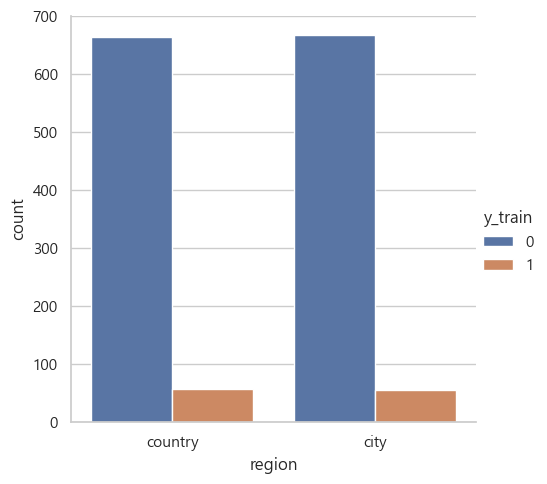

In [26]:
sns.catplot(data=region_data,x='region',kind='count',hue='y_train')

In [27]:
new_df['age'] = 2023-new_df['age']


C:\Users\hamin\AppData\Local\Temp\ipykernel_19472\3416552661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['age'] = 2023-new_df['age']


In [28]:
new_df['age'].max()

94

In [29]:
new_df.head()

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,gender,age,education,region,wage,workcode,y_total,y_train
1,1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,1,75,3,city,172.0,942.0,29.0,1
2,2,1.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1,81,7,city,100.0,762.0,18.0,0
3,3,1.0,4.0,1.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,1,61,6,city,268.0,855.0,20.0,0
4,4,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,3.0,2,60,5,city,140.0,399.0,21.0,0
8,8,2.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2,83,3,city,27.0,941.0,20.0,0


In [30]:
bins = [20,29,39,49,59,99]
labels = ['19~29세','30~39세','40~49세','50~59세','60세 이상']

cuts = pd.cut(new_df['age'],bins,labels=labels)
new_df['age_range'] = cuts
# new_df.head()

C:\Users\hamin\AppData\Local\Temp\ipykernel_19472\4263265101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['age_range'] = cuts


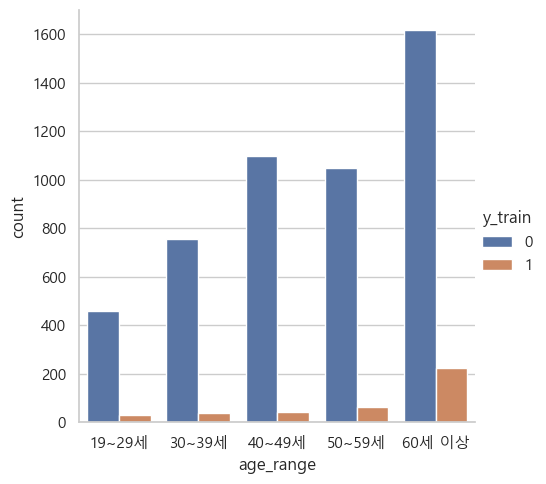

In [31]:
sns.catplot(data=new_df,x='age_range',kind='count',hue='y_train')

In [32]:
low_wage = new_df.loc[(new_df['wage']<=234),['wage','y_total']]
high_wage = new_df.loc[new_df['wage']>=600,['wage','y_total']]


In [33]:
new_df['wage'].describe()

count    5375.000000
mean      274.179535
std       214.327077
min         5.000000
25%       120.000000
50%       234.000000
75%       361.000000
max      2017.000000
Name: wage, dtype: float64

In [34]:
low_wage.head()

,wage,y_total
1,172.0,29.0
2,100.0,18.0
4,140.0,21.0
8,27.0,20.0
15,217.0,23.0


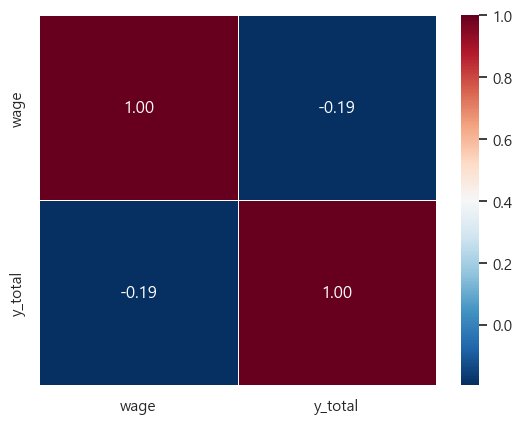

In [35]:
sns.heatmap(data = low_wage[['wage','y_total']].corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='RdBu_r')
sns.set_theme(font ='Malgun Gothic',
           rc = {'axes.unicode_minus' : False},
           style ='whitegrid')
plt.show()

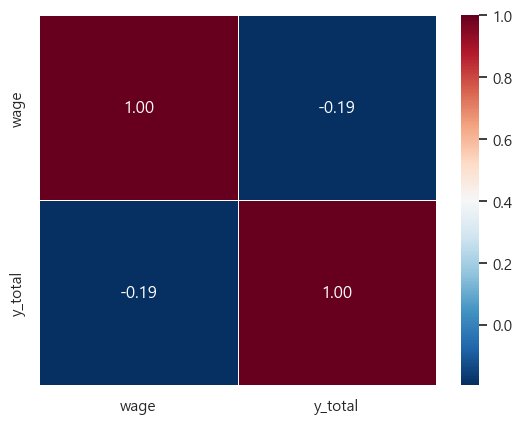

In [36]:
sns.heatmap(data = low_wage[['wage','y_total']].corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='RdBu_r')
sns.set_theme(font ='Malgun Gothic',
           rc = {'axes.unicode_minus' : False},
           style ='whitegrid')
plt.show()

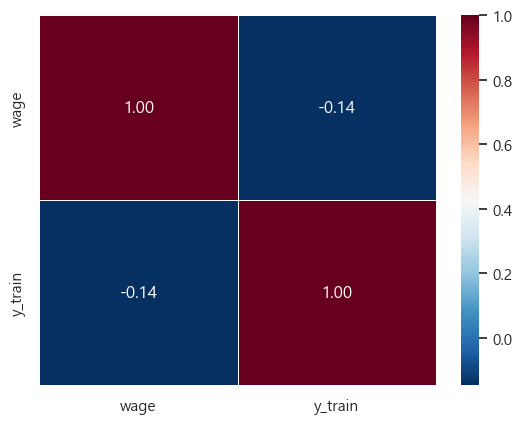

In [37]:
sns.heatmap(data = new_df[['wage','y_train']].corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='RdBu_r')
sns.set_theme(font ='Malgun Gothic',
           rc = {'axes.unicode_minus' : False},
           style ='whitegrid')
plt.show()

In [38]:
new_df['education'].unique()

array([3, 7, 6, 5, 4, 8, 2, 9], dtype=int64)

In [39]:
new_df.loc[new_df['education']<=3,'education']="초졸이하"
new_df.loc[new_df['education']==4,'education']="중졸"
new_df.loc[new_df['education']==5,'education']="고졸"
new_df.loc[new_df['education']==6,'education']="대졸이상"
new_df.loc[new_df['education']==7,'education']="대졸이상"
new_df.loc[new_df['education']==8,'education']="대졸이상"
new_df.loc[new_df['education']==9,'education']="대졸이상"
new_df['education'].unique()



array(['초졸이하', '대졸이상', '고졸', '중졸'], dtype=object)

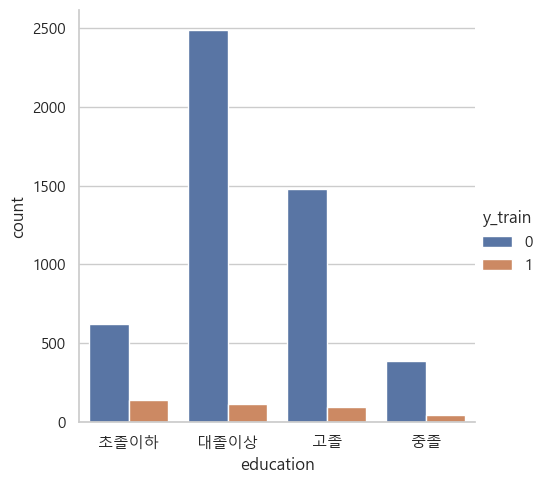

In [40]:
sns.catplot(data=new_df,x='education',kind='count',hue='y_train')

In [41]:
new_df['y_train'].value_counts()

y_train
0    4978
1     397
Name: count, dtype: int64

In [42]:
new_df

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q11,gender,age,education,region,wage,workcode,y_total,y_train,age_range
1,1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,...,3.0,1,75,초졸이하,city,172.0,942.0,29.0,1,60세 이상
2,2,1.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,...,1.0,1,81,대졸이상,city,100.0,762.0,18.0,0,60세 이상
3,3,1.0,4.0,1.0,2.0,2.0,2.0,4.0,1.0,1.0,...,1.0,1,61,대졸이상,city,268.0,855.0,20.0,0,60세 이상
4,4,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,...,3.0,2,60,고졸,city,140.0,399.0,21.0,0,60세 이상
8,8,2.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,2.0,...,2.0,2,83,초졸이하,city,27.0,941.0,20.0,0,60세 이상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16574,16574,1.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,...,1.0,1,42,대졸이상,city,297.0,942.0,17.0,0,40~49세
16575,16575,1.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,...,1.0,2,41,대졸이상,city,217.0,222.0,17.0,0,40~49세
16578,16578,1.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,...,1.0,1,46,대졸이상,city,420.0,311.0,17.0,0,40~49세
16579,16579,1.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,...,1.0,2,46,대졸이상,city,405.0,153.0,17.0,0,40~49세


In [43]:
new_df['workcode']

1        942.0
2        762.0
3        855.0
4        399.0
8        941.0
         ...  
16574    942.0
16575    222.0
16578    311.0
16579    153.0
16586    222.0
Name: workcode, Length: 5375, dtype: float64

In [44]:
condition = (
    ((new_df['workcode']>=100) & (new_df['workcode']<200)),
    ((new_df['workcode']>=300) & (new_df['workcode']<400)),
    ((new_df['workcode']>=400) & (new_df['workcode']<500)),
    ((new_df['workcode']>=600) & (new_df['workcode']<700)),
    ((new_df['workcode']>=700) & (new_df['workcode']<800))
)
value = ['관리직','사무종사자','서비스판매','농업','기능노무']
new_df['workcode'] = np.select(condition,value,default=0)
new_df['workcode'].unique()

C:\Users\hamin\AppData\Local\Temp\ipykernel_19472\1945594723.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['workcode'] = np.select(condition,value,default=0)


array(['0', '기능노무', '사무종사자', '관리직', '서비스판매', '농업'], dtype=object)

In [45]:
new_df['workcode'].unique()

array(['0', '기능노무', '사무종사자', '관리직', '서비스판매', '농업'], dtype=object)

In [46]:
new_df

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q11,gender,age,education,region,wage,workcode,y_total,y_train,age_range
1,1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,...,3.0,1,75,초졸이하,city,172.0,0,29.0,1,60세 이상
2,2,1.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,...,1.0,1,81,대졸이상,city,100.0,기능노무,18.0,0,60세 이상
3,3,1.0,4.0,1.0,2.0,2.0,2.0,4.0,1.0,1.0,...,1.0,1,61,대졸이상,city,268.0,0,20.0,0,60세 이상
4,4,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,...,3.0,2,60,고졸,city,140.0,사무종사자,21.0,0,60세 이상
8,8,2.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,2.0,...,2.0,2,83,초졸이하,city,27.0,0,20.0,0,60세 이상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16574,16574,1.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,...,1.0,1,42,대졸이상,city,297.0,0,17.0,0,40~49세
16575,16575,1.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,...,1.0,2,41,대졸이상,city,217.0,0,17.0,0,40~49세
16578,16578,1.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,...,1.0,1,46,대졸이상,city,420.0,사무종사자,17.0,0,40~49세
16579,16579,1.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,...,1.0,2,46,대졸이상,city,405.0,관리직,17.0,0,40~49세


In [49]:
new_df = new_df.loc[new_df['workcode']!="0", :]
new_df['workcode'].unique()

array(['기능노무', '사무종사자', '관리직', '서비스판매', '농업'], dtype=object)

In [51]:
new_df['workcode'].value_counts()

workcode
사무종사자    936
서비스판매    583
기능노무     368
관리직      240
농업        20
Name: count, dtype: int64

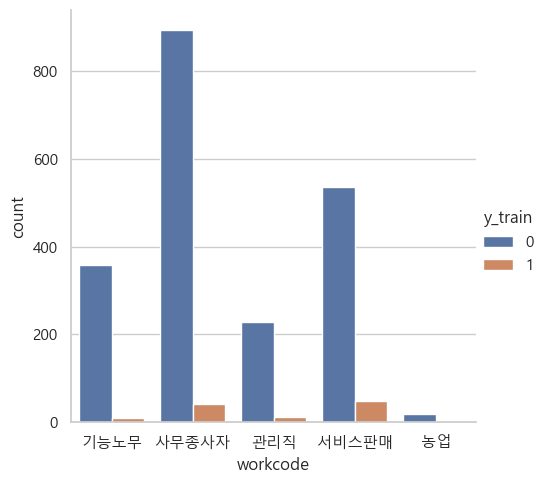

In [52]:
sns.catplot(data=new_df,x='workcode',kind='count',hue='y_train')